In [8]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch

In [9]:
base_url= 'https://understat.com/match/'
match= str(input('Enter the match ID: '))
url= base_url + match

In [10]:
# 18747

In [11]:
res= requests.get(url)
soup= BeautifulSoup(res.content, 'lxml') #Parse
scripts= soup.find_all('script') #Script

In [17]:
strings = scripts[1].string
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

data = json.loads(json_data) #Format
data

{'h': [{'id': '502997',
   'minute': '2',
   'result': 'MissedShots',
   'X': '0.8869999694824219',
   'Y': '0.524000015258789',
   'xG': '0.05964351445436478',
   'player': 'Sandro Tonali',
   'h_a': 'h',
   'player_id': '7958',
   'situation': 'OpenPlay',
   'season': '2022',
   'shotType': 'Head',
   'match_id': '18747',
   'h_team': 'AC Milan',
   'a_team': 'Roma',
   'h_goals': '2',
   'a_goals': '2',
   'date': '2023-01-08 19:45:00',
   'player_assisted': 'Rafael Leão',
   'lastAction': 'Cross'},
  {'id': '502998',
   'minute': '2',
   'result': 'MissedShots',
   'X': '0.9159999847412109',
   'Y': '0.45799999237060546',
   'xG': '0.04343798756599426',
   'player': 'Olivier Giroud',
   'h_a': 'h',
   'player_id': '502',
   'situation': 'OpenPlay',
   'season': '2022',
   'shotType': 'Head',
   'match_id': '18747',
   'h_team': 'AC Milan',
   'a_team': 'Roma',
   'h_goals': '2',
   'a_goals': '2',
   'date': '2023-01-08 19:45:00',
   'player_assisted': 'Sandro Tonali',
   'lastActi

In [18]:
x = []
y = []
xG = []
result = []
st = []
min = []
team = data['h']

for index in range(len(team)): #Loop in a loop
    for key in team[index]:
        if key == 'X':
            x.append(team[index][key])
        if key == 'Y':
            y.append(team[index][key])
        if key == 'xG':
            xG.append(team[index][key])
        if key == 'result':
            result.append(team[index][key])
        if key == 'shotType':
            st.append(team[index][key])
        if key == 'minute':
            min.append(team[index][key])

In [14]:
col_names = ['x','y']
df = pd.DataFrame([x,y],index=col_names) #Dataframe
data = df.T

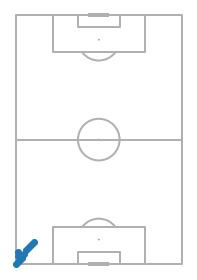

In [15]:
pitch = VerticalPitch(half=False)
fig, ax = pitch.draw(figsize=(6, 4))

plt.scatter(data['x'], data['y']) #Scatter

In [19]:
col=['xG','Minute','Type of Shot']
dt=pd.DataFrame([xG,min,st],index=col)
dtt=dt.T
dtt

,xG,Minute,Type of Shot
0,0.05964351445436478,2,Head
1,0.04343798756599426,2,Head
2,0.05888213589787483,24,LeftFoot
3,0.032280124723911285,28,RightFoot
4,0.09421883523464203,29,Head
5,0.05378592386841774,36,RightFoot
6,0.11264250427484512,47,LeftFoot
7,0.0232204832136631,51,LeftFoot
8,0.05480002611875534,53,Head
9,0.028529055416584015,60,RightFoot


In [22]:
def xgsum(xG_list):
    xgcum = 0
    for xG in dtt:
        xgcum += xG
    return xgcum

ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.


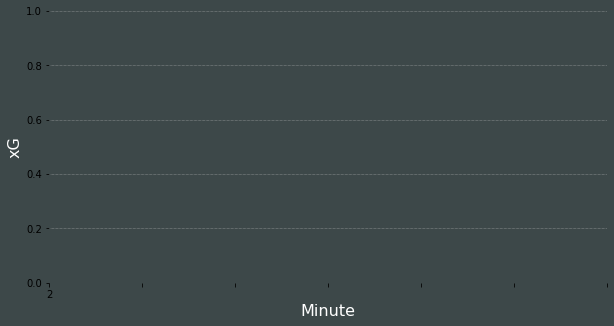

In [23]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

#set up our base layer
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute',fontname='Andale Mono',color='white',fontsize=16)
plt.ylabel('xG',fontname='Andale Mono',color='white',fontsize=16)

#plot the step graphs
ax.step(x=min,y=xgsum,color='#d3d3d3',linewidth=5,where='post')